In [1]:
import os
import matplotlib.pyplot as plt
import random
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
from google.colab import files
files.upload()

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d prasadvpatil/mrl-dataset

In [ ]:
!unzip mrl-dataset.zip -d mrl-dataset

In [6]:
# Paths to Closed_Eyes and Open_Eyes folders
closed_eyes_path = "mrl-dataset/train/Closed_Eyes"
open_eyes_path = "mrl-dataset/train/Open_Eyes"

# Count images in each folder
closed_count = len(os.listdir(closed_eyes_path))
open_count = len(os.listdir(open_eyes_path))

print(f"Number of Closed_Eyes images: {closed_count}")
print(f"Number of Open_Eyes images: {open_count}")

Number of Closed_Eyes images: 2000
Number of Open_Eyes images: 2000


In [ ]:
images = []
labels = []

# Looping through Closed_Eyes and Open_Eyes images, processing them, and assigning them label "0" or "1"
for img_name in os.listdir(closed_eyes_path):
    img_path = os.path.join(closed_eyes_path, img_name)
    # Ensuring it's in RGB format
    img = Image.open(img_path).convert("RGB")
    # Resizing images to 48x48
    img = img.resize((48, 48))
    images.append(np.array(img))
    labels.append(0)

for img_name in os.listdir(open_eyes_path):
    img_path = os.path.join(open_eyes_path, img_name)
    img = Image.open(img_path).convert("RGB")
    img = img.resize((48, 48))
    images.append(np.array(img))
    labels.append(1)

images = np.array(images) / 255.0
labels = np.array(labels)

# Spliting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Checking the shapes of the resulting datasets
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (3200, 48, 48, 3)
Testing data shape: (800, 48, 48, 3)


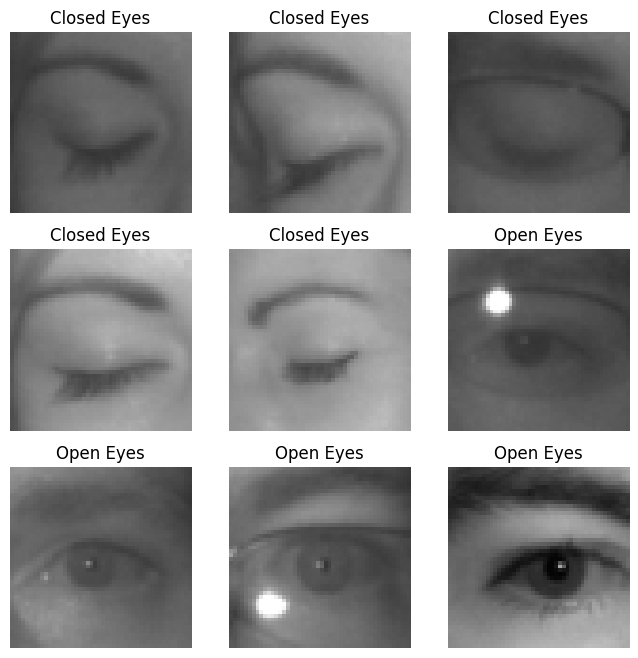

In [ ]:
# Selecting 5 random images from Closed_Eyes and 4 random images from Open_Eyes
closed_indices = [i for i in range(len(y_train)) if y_train[i] == 0]
open_indices = [i for i in range(len(y_train)) if y_train[i] == 1]

random_closed = random.sample(closed_indices, 5)
random_open = random.sample(open_indices, 4)

# Combine selected indices and load corresponding images
selected_indices = random_closed + random_open
selected_images = X_train[selected_indices]
selected_labels = y_train[selected_indices]

# Plotting images in a 3x3 grid
plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_images[i])
    plt.title("Closed Eyes" if selected_labels[i] == 0 else "Open Eyes")
    plt.axis("off")

plt.show()

In [ ]:
# Defining the CNN model
model = Sequential([
    # First convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    # Pooling layer to reduce spatial dimensions
    MaxPooling2D(pool_size=(2, 2)),

    # Second convolutional layer with 64 filters
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Third convolutional layer with 128 filters
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening the 3D output to 1D for the fully connected layer
    Flatten(),

    # Fully connected layer with 128 neurons
    Dense(128, activation='relu'),
    # Dropout layer to reduce overfitting
    Dropout(0.5),

    # Output layer with 2 neurons (Closed_Eyes and Open_Eyes) and softmax activation
    Dense(2, activation='softmax')
])

# Displaying the model's architecture
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 355,778 (1.36 MB)

 Trainable params: 355,778 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compiling the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
# Print the loss and accuracy
train_loss, train_accuracy = history.history['loss'][-1], history.history['accuracy'][-1]
test_loss, test_accuracy = history.history['val_loss'][-1], history.history['val_accuracy'][-1]
print(f'Train Loss: {train_loss :.3f}, Train Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Loss: {test_loss :.3f}, Test Accuracy: {test_accuracy * 100:.2f}%')

Train Loss: 0.000, Train Accuracy: 100.00%
Test Loss: 0.006, Test Accuracy: 99.75%


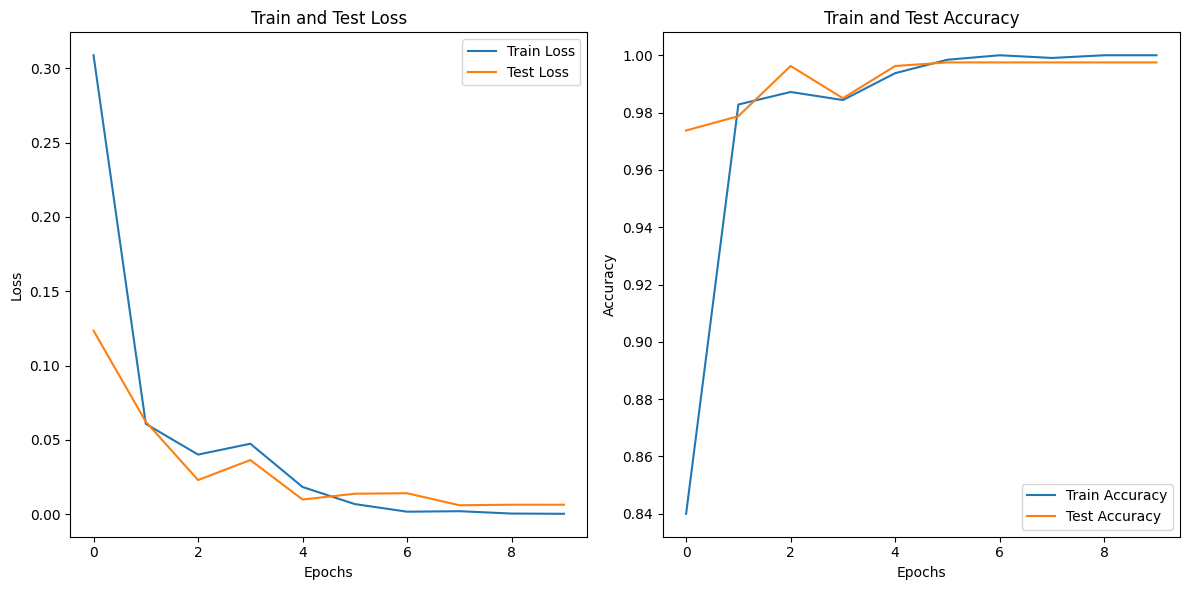

In [ ]:
# Extract accuracy and loss from history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
test_loss = history.history['val_loss']
test_accuracy = history.history['val_accuracy']

epochs_range = range(len(train_loss))
# Plot for loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_loss, label='Train Loss')
plt.plot(epochs_range, test_loss, label='Test Loss')
plt.title('Train and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot for accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_accuracy, label='Train Accuracy')
plt.plot(epochs_range, test_accuracy, label='Test Accuracy')
plt.title('Train and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


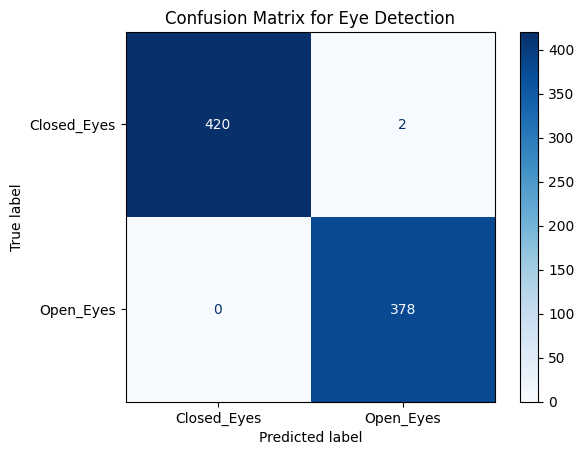

In [ ]:
# Make predictions on the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define class labels for display
class_names = ["Closed_Eyes", "Open_Eyes"]

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Eye Detection")
plt.show()

In [ ]:
model.save('/content/eye_detection_model.h5')
files.download('/content/eye_detection_model.h5')

In [ ]:
# Upload the model
uploaded = files.upload()

from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('/content/eye_detection_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


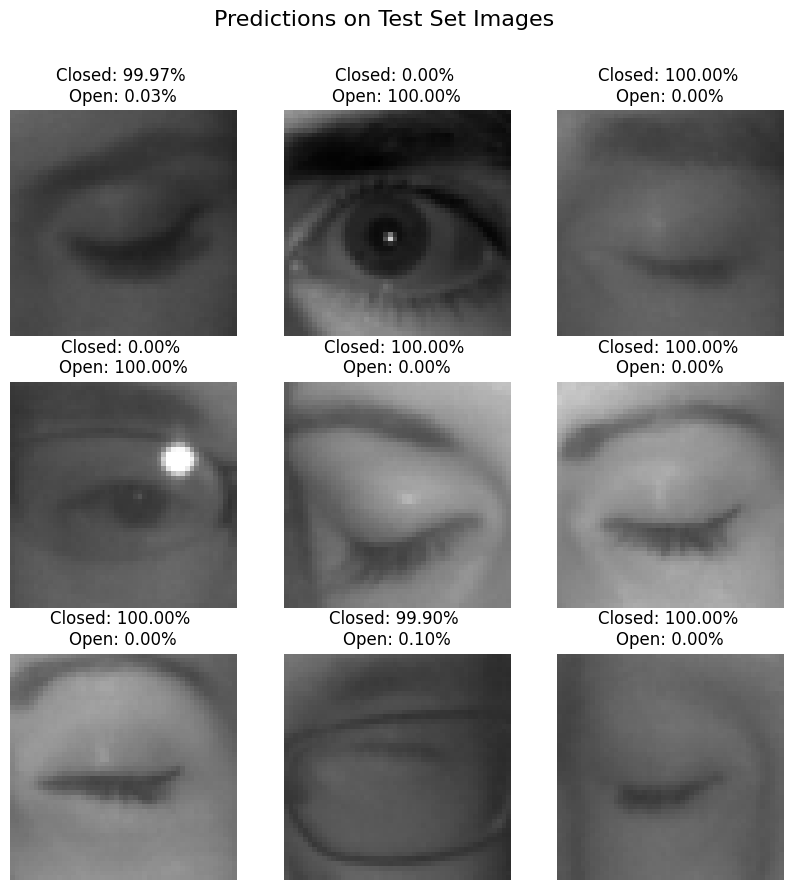

In [16]:
class_names = ["Closed_Eyes", "Open_Eyes"]

num_images = 9
indices = np.random.choice(len(X_test), num_images, replace=False)
selected_images = X_test[indices]
selected_labels = y_test[indices]

# Predicting with the model
predictions = model.predict(selected_images)

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(selected_images[i])

    # Extract the probabilities for both classes
    prob_closed = predictions[i][0]
    prob_open = predictions[i][1]

    # Determine the predicted class
    predicted_class = 1 if prob_open > prob_closed else 0
    predicted_label = class_names[predicted_class]

    # Display both probabilities and the predicted label
    plt.title(f"Closed: {prob_closed * 100:.2f}% \nOpen: {prob_open * 100:.2f}%")
    plt.axis("off")
    plt.grid(True)

plt.suptitle("Predictions on Test Set Images", fontsize=16)
plt.show()
